## :  Previous Script Available

In [1]:
# execute this for the 1st time
# !pip install -r example-requirements.txt 

# download file 
!wget http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat # linux

# and place in folder data/

--2022-05-30 13:21:17--  http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat
Resolving helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)... 139.82.34.10
Connecting to helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)|139.82.34.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267634147 (255M)
Saving to: ‘data3SS2009.mat.2’

data3SS2009.mat.2   100%[===================>] 255.24M  4.12MB/s    in 49s     

2022-05-30 13:22:06 (5.26 MB/s) - ‘data3SS2009.mat.2’ saved [267634147/267634147]



In [2]:
! pip install statsmodels==0.13.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import numpy as np
import matplotlib 
import scipy
import sklearn
import statsmodels
import seaborn
import pydot
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

from statsmodels.tsa.ar_model import AutoReg 

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


from scipy import stats
from scipy.stats.stats import mode
from scipy.stats import uniform
from sklearn.model_selection import (train_test_split, RepeatedKFold,RandomizedSearchCV)

from sklearn.linear_model import Ridge

from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pickle


from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import plotly.express as px
from sklearn.svm import OneClassSVM

from sklearn.manifold import TSNE


from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [4]:
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## : Início do processamento

In [6]:
fname = join(getcwd(),'data3SS2009.mat')

mat_contents = sio.loadmat(fname)

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape 
# N: number of samples
# Chno: number of channels
# Nc: number of cases

y = mat_contents['labels'].reshape(Nc)
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [7]:
np.where(y==10)
print(dataset.shape)

(8192, 5, 850)


In [8]:
y_bin_damaged = np.zeros((1,850))
y_bin_damaged[:,450:] = y_bin_damaged[:,450:] +1
y_bin_damaged

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

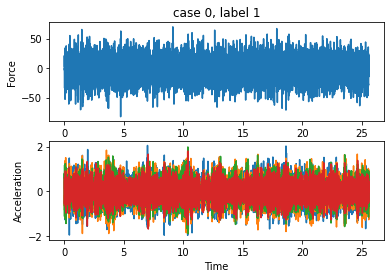

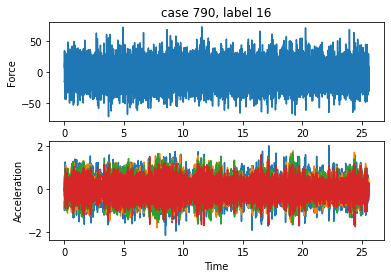

In [9]:
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

Ts = 3.125 * 1e-3 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

for case in np.array([0,790]):
    plt.figure(case)
    plt.subplot(211)
    plt.title('case %d, label %d' % (case, y[case]))
    plt.plot(time,Ch1[:,case])
    plt.ylabel('Force')
    plt.subplot(212)
    plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()

In [10]:
Ch2.shape

(8192, 850)

In [11]:
X = np.concatenate((Ch2,Ch3,Ch4,Ch5))

X

print( 'matrix X: ', X, '\n matrix X.shape: ',X.shape)

matrix X:  [[ 0.14656393  0.12344872 -0.42452564 ...  0.62527312  0.18531354
  -0.08524884]
 [ 0.79236289  0.26123975 -0.52503197 ...  0.5761841   0.75775165
  -0.38039847]
 [ 0.17113439  0.98893784  0.60084113 ... -0.10711284  0.6940215
  -0.20874206]
 ...
 [ 0.21738063  0.40702133  0.44190305 ... -0.43805704  0.31272412
   0.07283314]
 [-0.03923676  0.18921679  0.05709407 ... -0.40076345  0.02953589
   0.34142521]
 [ 0.03684378 -0.30327268 -0.64940672 ... -0.17947949 -0.69738006
   0.42497897]] 
 matrix X.shape:  (32768, 850)


## Feature extraction AR

In [12]:
FeatAR = []
na = 29
for i in range(0,850):
  ARmodel2 = AutoReg(Ch2[:,i],na).fit()
  ARmodel3 = AutoReg(Ch3[:,i],na).fit()
  ARmodel4 = AutoReg(Ch4[:,i],na).fit()
  ARmodel5 = AutoReg(Ch5[:,i],na).fit()
  ARparams = np.concatenate([ARmodel2.params,ARmodel3.params, ARmodel4.params,ARmodel5.params])
  FeatAR.append(ARparams)
FeatAR = np.array(FeatAR)


In [13]:
FeatAR.shape

(850, 120)

## : feature extraction PCA 


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
X_pca = pca.fit_transform(FeatAR)

print('matrix X.shape: ',X_pca.shape,'\n X_PCA:', X_pca)

matrix X.shape:  (850, 6) 
 X_PCA: [[ 7.66136505 -1.41780663  0.80665171  0.89625556 -1.19463583 -0.13840328]
 [ 6.8869037  -1.70474591  0.96095314 -0.0090899  -1.74358116 -0.49638477]
 [ 6.94763838 -1.5554447   0.94936492  0.13319058 -0.83617666 -0.46298613]
 ...
 [-5.24160818 -1.38243332  1.19297854 -2.02374849 -0.32984218  0.81221121]
 [-5.06151016 -1.37825724  1.20604602 -0.0969439   0.34497989  0.90045879]
 [-5.24563384 -1.14354112  1.67658163  0.0533145   0.28827159  0.88529276]]


In [15]:
print(pca.explained_variance_ratio_ , pca.singular_values_)

[0.64699238 0.12653811 0.09021831 0.0510888  0.02622314 0.01953216] [131.93541573  58.34753064  49.26734492  37.0744467   26.56159486
  22.92381596]


## : Scale Feature

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalizando AR
X1_max_min = MinMaxScaler(feature_range=(-1,1))
X1_train = X1_max_min.fit_transform(FeatAR)
X1_train

# Normalizando PCA
X2_max_min = MinMaxScaler(feature_range=(-1,1))
X2_train = X2_max_min.fit_transform(X_pca)
X2_train

print('Confirmando a normalização:','\n X1 máximo normalizado: ', X1_train.max(), '\n X1 minimo normalizado: ',X1_train.min(),'\n X2 máximo normalizado: ', X2_train.max(), '\n X2 minimo normalizado: ',X2_train.min())


Confirmando a normalização: 
 X1 máximo normalizado:  1.0000000000000009 
 X1 minimo normalizado:  -1.0000000000000002 
 X2 máximo normalizado:  1.0 
 X2 minimo normalizado:  -1.0


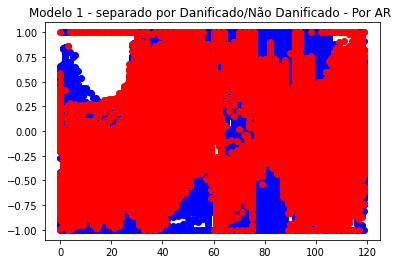

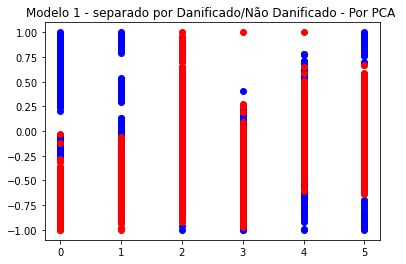

In [17]:
# Plotando os resultados comparando o X1 com X2 

# Dividi o problema em duas soluções:  - Não danificado em AZUL e Danificado em vermelho


Y1 = np.array(range(0,120))
Y2 = np.array(range(0,6))

# Plot do AR
for case in range(0,850):
  if y_bin_damaged[0,case]==0:
    color_name = 'blue'
  else:
    color_name = 'red'
    plt.title('Modelo 1 - separado por Danificado/Não Danificado - Por AR ')
  plt.scatter(Y1,X1_train[case,:], color = color_name)
plt.show()

# Plot do PCA
for case in range(0,850):
  if y_bin_damaged[0,case]==0:
    color_name = 'blue'
  else:
    color_name = 'red'
    plt.title('Modelo 1 - separado por Danificado/Não Danificado - Por PCA ')
  plt.scatter(Y2,X2_train[case,:], color = color_name)
plt.show()
  

Ao plotar o modelo AR é possível observar que a grande quantidade de dados dificulas a leitura e interpretação do problema. Quando ao gráfico com PCA, a redução de variaveis facilita a interpretação dos resultados neste caso.

## : SOFTMAX

In [18]:


softmax1 = LogisticRegression(random_state=0,max_iter= 2000).fit(X1_train,y)
softmax2 = LogisticRegression(random_state=0,max_iter= 2000).fit(X2_train,y)


predict_1 = softmax1.predict(X1_train)
proba_1 = softmax1.predict_proba(X1_train)
score_1 = softmax1.score(X1_train,y)                           

predict_2 = softmax2.predict(X2_train)
proba_2 = softmax2.predict_proba(X2_train)
score_2 = softmax2.score(X2_train,y)  

print('score_1', score_1,'\n score_2', score_2)

score_1 0.9988235294117647 
 score_2 0.908235294117647


## : SVC

In [19]:
# AR

svc_linear_1 = svm.SVC(C=1.0, kernel='linear').fit(X1_train,y)
svc_poly_1 = svm.SVC(C=1.0, kernel='poly').fit(X1_train,y)
svc_rbf_1 = svm.SVC(C=1.0, kernel='rbf').fit(X1_train,y)
svc_sig_1 = svm.SVC(C=1.0, kernel='sigmoid').fit(X1_train,y)

linear_1_predict = svc_linear_1.predict(X1_train)
poly_1_predict = svc_poly_1.predict(X1_train)
rbf_1_predict = svc_rbf_1.predict(X1_train)
sig_1_predict = svc_sig_1.predict(X1_train)

svm_linear_1 = svc_linear_1.score(X1_train,y)
svm_ploy_1 = svc_poly_1.score(X1_train,y) 
svm_rbf_1 = svc_rbf_1.score(X1_train,y) 
svm_sig_1 = svc_sig_1.score(X1_train,y)

# PCA

svc_linear_2 = svm.SVC(C=1.0, kernel='linear').fit(X2_train,y)
svc_poly_2 = svm.SVC(C=1.0, kernel='poly').fit(X2_train,y)
svc_rbf_2 = svm.SVC(C=1.0, kernel='rbf').fit(X2_train,y)
svc_sig_2 = svm.SVC(C=1.0, kernel='sigmoid').fit(X2_train,y)

linear_2_predict = svc_linear_2.predict(X2_train)
poly_2_predict = svc_poly_2.predict(X2_train)
rbf_2_predict = svc_rbf_2.predict(X2_train)
sig_2_predict = svc_sig_2.predict(X2_train)

svm_linear_2 = svc_linear_2.score(X2_train,y)
svm_poly_2 = svc_poly_2.score(X2_train,y) 
svm_rbf_2 = svc_rbf_2.score(X2_train,y) 
svm_sig_2 = svc_sig_2.score(X2_train,y) 

print('svm_linear_1', svm_linear_1, '\n svm_ploy_1', svm_ploy_1, '\n svm_rbf_1', svm_rbf_1, '\n svm_sig_1', svm_sig_1)
print('\n svm_linear_2', svm_linear_2, '\n svm_poly_2', svm_poly_2, '\n svm_rbf_2', svm_rbf_2, '\n svm_sig_2', svm_sig_2)

svm_linear_1 1.0 
 svm_ploy_1 0.9988235294117647 
 svm_rbf_1 0.9976470588235294 
 svm_sig_1 0.9847058823529412

 svm_linear_2 0.9364705882352942 
 svm_poly_2 0.9341176470588235 
 svm_rbf_2 0.9364705882352942 
 svm_sig_2 0.8505882352941176


## : kNN

In [20]:
#AR
knn_5_1 = KNeighborsClassifier(n_neighbors=5).fit(X1_train,y)
knn_10_1 = KNeighborsClassifier(n_neighbors=10).fit(X1_train,y)
knn_15_1 = KNeighborsClassifier(n_neighbors=15).fit(X1_train,y)
knn_20_1 = KNeighborsClassifier(n_neighbors=20).fit(X1_train,y)

knn_5_ar = knn_5_1.score(X1_train,y)
knn_10_ar = knn_10_1.score(X1_train,y) 
knn_15_ar = knn_15_1.score(X1_train,y) 
knn_20_ar = knn_20_1.score(X1_train,y)


#PCA
knn_5_2 = KNeighborsClassifier(n_neighbors=5).fit(X2_train,y)
knn_10_2 = KNeighborsClassifier(n_neighbors=10).fit(X2_train,y)
knn_15_2 = KNeighborsClassifier(n_neighbors=15).fit(X2_train,y)
knn_20_2 = KNeighborsClassifier(n_neighbors=20).fit(X2_train,y)

knn_5_pca = knn_5_2.score(X2_train,y)
knn_10_pca = knn_10_2.score(X2_train,y) 
knn_15_pca = knn_15_2.score(X2_train,y) 
knn_20_pca = knn_20_2.score(X2_train,y)

print(' knn_5_ar', knn_5_ar, '\n knn_10_ar', knn_10_ar, '\n knn_15_ar', knn_15_ar, '\n knn_20_ar', knn_20_ar)
print('\n knn_5_pca', knn_5_pca, '\n knn_10_pca', knn_10_pca, '\n knn_15_pca', knn_15_pca, '\n knn_20_pca', knn_20_pca)

 knn_5_ar 0.9941176470588236 
 knn_10_ar 0.9894117647058823 
 knn_15_ar 0.9870588235294118 
 knn_20_ar 0.9870588235294118

 knn_5_pca 0.9376470588235294 
 knn_10_pca 0.9376470588235294 
 knn_15_pca 0.9294117647058824 
 knn_20_pca 0.9235294117647059


## : Creates List of Dictionaries

In [21]:
param_grid = []

param_grid.append(
    [
     {
      "LGR__C": stats.loguniform(1e-2,1e2),
     }
    ]
)


param_grid.append(
    [
     {
      "SVC__C": stats.loguniform(1e-2,1e2),
      "SVC__kernel": ["linear","poly","rbf","sigmoid"],   
     }
    ]
)



param_grid.append(
    [
     {
      "KNN__n_neighbors": stats.randint(2,100),
      "KNN__weights": ["uniform","distance"],
     }
    ]
)

param_grid.append(
    [
        {
            "DTR__criterion": [ "friedman_mse"],
            "DTR__splitter": ["best","random"],
            "DTR__max_features": stats.uniform(),
        }
    ]

)


param_grid.append(
    [
        {
            "RFR__n_estimators": stats.randint(2,100),
            "RFR__criterion": ["absolute_error"],
            "RFR__max_depth": stats.randint(2,20),
            "RFR__max_features": stats.uniform(),
        }
    ]

)



models = []

models.append(("LGR", LogisticRegression(max_iter=1000)))
models.append(("SVC",SVC()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("DTR", DecisionTreeRegressor()))
models.append(("RFR", RandomForestRegressor()))

In [22]:
N_REPS=2#50
N_SPLITS=2#5
N_ITERS=5#100
models_list=['LGR','SVC','KNN','DTR','RFR']

## : Hyperparameter

In [23]:
from sklearn.model_selection import train_test_split

# AR

random_search_AR={}
param_grids_AR={}
yh_test_AR={}
acc1={}
for k in range(0,5):
  X_train_AR, X_test_AR, y_train_AR, y_test_AR = train_test_split(X1_train,y, 
                                                                  test_size=0.6, 
                                                                  random_state=42)
  rkf = RepeatedKFold(n_splits=N_SPLITS,n_repeats=N_REPS,random_state=42)
  clf = Pipeline([("scaler",StandardScaler()), (models[k])])
  param_grids_AR[models_list[k]] = param_grid[k]
  random_search_AR[models_list[k]] = RandomizedSearchCV(clf,verbose=1, 
                                                        scoring="neg_mean_squared_error",
                                                        param_distributions=param_grids_AR[models_list[k]],
                                                        n_iter=N_ITERS,
                                                        n_jobs=-1,
                                                        cv=rkf,
                                                        random_state=42)
  random_search_AR[models_list[k]].fit(X_train_AR,y_train_AR)

  yh_test_AR[models_list[k]] = random_search_AR[models_list[k]].predict(X_test_AR)
  acc1[models_list[k]] = random_search_AR[models_list[k]].score(X_test_AR, y_test_AR)
  print('Accuracy Score: ',models_list[k], ' AR: ', acc1[models_list[k]])

# PCA

random_search_PCA={}
param_grids_PCA={}
yh_test_PCA={}
acc2={}
for k in range(0,5):

  X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X2_train,y, 
                                                                      test_size=0.6, 
                                                                      random_state=42)
  rkf = RepeatedKFold(n_splits=N_SPLITS,n_repeats=N_REPS,random_state=42)
  clf = Pipeline([("scaler",StandardScaler()), (models[k])])
  param_grids_PCA[models_list[k]] = param_grid[k]
  random_search_PCA[models_list[k]] = RandomizedSearchCV(clf,verbose=1, 
                                                         scoring="neg_mean_squared_error",
                                                         param_distributions=param_grids_PCA[models_list[k]],
                                                         n_iter=N_ITERS,
                                                         n_jobs=-1,
                                                         cv=rkf,
                                                         random_state=42)
  random_search_PCA[models_list[k]].fit(X_train_PCA,y_train_PCA)  
  yh_test_PCA[models_list[k]] = random_search_PCA[models_list[k]].predict(X_test_PCA)
  acc2[models_list[k]] = random_search_PCA[models_list[k]].score(X_test_PCA, y_test_PCA)
  print('Accuracy Score: ',models_list[k], ' PCA: ', acc1[models_list[k]])

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy Score:  LGR  AR:  -0.0
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy Score:  SVC  AR:  -0.0
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy Score:  KNN  AR:  -0.5433670343137255
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy Score:  DTR  AR:  -1.4490196078431372
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy Score:  RFR  AR:  -0.3230602313239345
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy Score:  LGR  PCA:  -0.0
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy Score:  SVC  PCA:  -0.0
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy Score:  KNN  PCA:  -0.5433670343137255
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy Score:  DTR  PCA:  -1.4490196078431372
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy Score:  RFR  PCA:  -0.32

In [24]:
results_dict = {
    'Results_AR':random_search_AR,
    'yh_AR':yh_test_AR,
    'Results_PCA':random_search_PCA,
    'yh_PCA':yh_test_PCA,
}

In [25]:
a_file = open("TakeHome5_results_n_reps"+str(N_REPS)+".pkl", "wb")
pickle.dump(results_dict, a_file)
a_file.close()

## :Unsupervised Learning

In [26]:
#KMeans model

import plotly.express as px

# AR
kmeans_AR = KMeans(n_clusters=8, random_state=0).fit(X_train_AR)
kmeans_AR.labels_
kmeans_AR_pred = kmeans_AR.predict(X_test_AR)

# list_of_tuples = list(zip(kmeans_AR_pred, X_test_AR))

df = pd.DataFrame(X_test_AR)
df['yh'] = kmeans_AR_pred 


fig1 = px.scatter_3d(df, x = 0, y = 1, z = 2, color='yh')

fig1.show()

# X_embedded = TSNE(n_components=2, learning_rate='auto',
#                   init='random').fit_transform(X)

# PCA
kmeans_PCA = KMeans(n_clusters=6, random_state=0).fit(X_train_PCA)
kmeans_PCA.labels_
kmeans_PCA_pred = kmeans_PCA.predict(X_test_PCA)



print('kmeans_AR_pred\n', kmeans_AR_pred, '\n kmeans_PCA_pred\n', kmeans_PCA_pred)


kmeans_AR_pred
 [5 4 0 3 0 0 1 6 1 1 1 4 1 5 2 5 6 0 4 5 6 4 2 2 4 5 2 5 6 3 1 6 5 5 2 5 1
 1 7 0 5 0 0 2 1 6 3 5 1 1 0 6 1 5 7 3 5 4 4 3 0 4 1 5 5 6 4 5 6 2 0 1 0 3
 5 4 0 1 1 6 5 6 0 1 0 5 0 5 5 3 4 3 3 1 0 0 1 6 4 0 3 1 5 0 0 1 3 5 0 3 6
 6 4 3 6 6 7 4 4 6 5 5 0 0 5 1 6 2 3 2 0 1 5 6 5 1 0 0 3 7 4 0 6 5 0 5 5 4
 6 0 7 4 5 5 5 5 1 4 3 5 3 5 3 5 0 6 7 6 0 4 6 4 6 0 2 1 2 2 3 1 1 5 6 5 3
 5 1 1 4 0 0 4 5 6 4 1 6 4 0 4 2 5 0 3 5 5 6 1 2 3 5 4 6 4 0 7 3 5 4 3 5 5
 5 4 6 3 1 0 1 7 1 5 1 7 0 1 0 0 6 0 4 4 6 1 2 0 0 7 7 0 1 7 1 5 1 0 1 4 0
 7 0 5 5 0 3 1 5 0 2 2 6 4 0 5 1 1 0 5 0 4 0 1 5 1 0 6 1 4 0 4 1 5 6 4 3 4
 4 0 5 1 0 0 5 6 6 3 1 7 4 5 2 1 5 4 4 1 5 7 3 1 7 2 5 1 0 0 1 4 0 0 6 0 1
 0 3 1 1 5 5 0 0 1 0 0 6 7 1 5 3 3 7 3 5 7 3 3 3 6 3 6 5 0 0 4 6 4 4 4 2 1
 4 4 6 3 0 2 0 4 2 5 1 3 5 6 1 2 2 0 1 1 5 6 7 3 5 7 0 5 5 6 0 3 7 6 5 5 2
 0 1 0 0 3 6 2 0 5 4 1 4 5 0 6 3 0 2 3 1 1 6 6 3 0 5 5 1 5 4 6 3 6 4 6 1 0
 6 4 1 6 7 5 1 0 0 3 1 0 4 3 1 5 3 7 6 5 0 5 0 0 3 1 7 5 0 6 4 5 5 6 4 1 0
 1 4 5 0 

In [27]:
##TSNE

#AR
X_embedded_AR = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(X1_train)

df = pd.DataFrame(X_embedded_AR)
df['yh']=y

# fig1 = px.scatter_3d(df, x = 0, y = 1, z = 2, color='yh')

# fig1.show()

#PCA

X_embedded_PCA = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(X2_train)

df = pd.DataFrame(X_embedded_PCA)
df['yh']=y

# fig2 = px.scatter_3d(df, x = 0, y = 1, z = 2, color='yh')

# fig2.show()

In [28]:
#One Class SVM

#AR
clf_AR = OneClassSVM(gamma='scale',nu=0.01).fit(X_train_AR)
OC_AR_pred = clf_AR.predict(X_train_AR)


#PCA
clf_PCA = OneClassSVM(gamma='scale',nu=0.01).fit(X_train_PCA)
OC_PCA_pred = clf_PCA.predict(X_train_PCA)

print('OC_AR_pred \n',OC_AR_pred,'\nOC_PCA_pred\n',OC_PCA_pred)


OC_AR_pred 
 [ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  

## DEEP LEARNING

train number:~ 0
Epoch 1/120
55/55 [==============================] - 73s 6ms/step - loss: 2.4910 - accuracy: 0.2647 - val_loss: 2.2449 - val_accuracy: 0.2721
Epoch 2/120
55/55 [==============================] - 0s 3ms/step - loss: 1.7943 - accuracy: 0.4926 - val_loss: 1.7098 - val_accuracy: 0.5074
Epoch 3/120
55/55 [==============================] - 0s 3ms/step - loss: 1.2536 - accuracy: 0.6342 - val_loss: 1.1978 - val_accuracy: 0.6029
Epoch 4/120
55/55 [==============================] - 0s 3ms/step - loss: 0.7951 - accuracy: 0.7960 - val_loss: 0.6658 - val_accuracy: 0.9118
Epoch 5/120
55/55 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.9724 - val_loss: 0.3231 - val_accuracy: 0.9706
Epoch 6/120
55/55 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9908 - val_loss: 0.1698 - val_accuracy: 1.0000
Epoch 7/120
55/55 [==============================] - 0s 4ms/step - loss: 0.1217 - accuracy: 0.9963 - val_loss: 0.1076 - val_accuracy: 1.

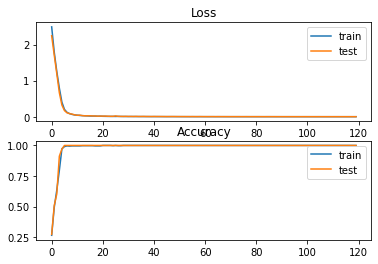

train number:~ 1
Epoch 1/120
55/55 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.1858 - val_accuracy: 0.9706
Epoch 2/120
55/55 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9871 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/120
55/55 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4/120
55/55 [==============================] - 0s 3ms/step - loss: 3.4251e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/120
55/55 [==============================] - 0s 3ms/step - loss: 2.7335e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/120
55/55 [==============================] - 0s 3ms/step - loss: 2.4141e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/120
55/55 [==============================] - 0s 3ms/step - loss: 2.2008e-04 - accuracy: 1.0000 - val_loss: 9.7699e-04

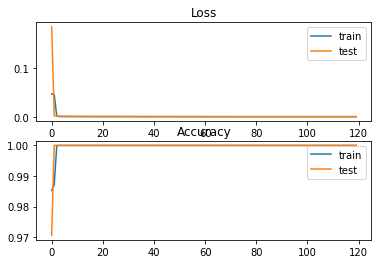

train number:~ 2
Epoch 1/120
55/55 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9982 - val_loss: 5.9200e-04 - val_accuracy: 1.0000
Epoch 2/120
55/55 [==============================] - 0s 3ms/step - loss: 0.1564 - accuracy: 0.9706 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/120
55/55 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9982 - val_loss: 6.3657e-04 - val_accuracy: 1.0000
Epoch 4/120
55/55 [==============================] - 0s 3ms/step - loss: 3.6015e-04 - accuracy: 1.0000 - val_loss: 3.7704e-04 - val_accuracy: 1.0000
Epoch 5/120
55/55 [==============================] - 0s 2ms/step - loss: 2.0041e-04 - accuracy: 1.0000 - val_loss: 3.0078e-04 - val_accuracy: 1.0000
Epoch 6/120
55/55 [==============================] - 0s 3ms/step - loss: 1.5293e-04 - accuracy: 1.0000 - val_loss: 2.5311e-04 - val_accuracy: 1.0000
Epoch 7/120
55/55 [==============================] - 0s 3ms/step - loss: 1.2947e-04 - accuracy: 1.0000 - 

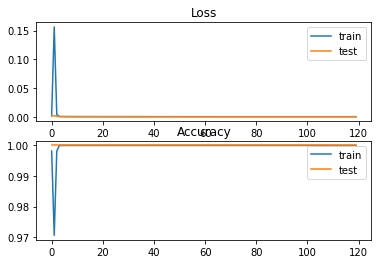

train number:~ 3
Epoch 1/120
55/55 [==============================] - 0s 3ms/step - loss: 1.8178e-05 - accuracy: 1.0000 - val_loss: 4.8875e-06 - val_accuracy: 1.0000
Epoch 2/120
55/55 [==============================] - 0s 3ms/step - loss: 7.7911e-06 - accuracy: 1.0000 - val_loss: 4.6429e-06 - val_accuracy: 1.0000
Epoch 3/120
55/55 [==============================] - 0s 3ms/step - loss: 7.0975e-06 - accuracy: 1.0000 - val_loss: 4.5027e-06 - val_accuracy: 1.0000
Epoch 4/120
55/55 [==============================] - 0s 3ms/step - loss: 6.7421e-06 - accuracy: 1.0000 - val_loss: 4.3966e-06 - val_accuracy: 1.0000
Epoch 5/120
55/55 [==============================] - 0s 3ms/step - loss: 6.3757e-06 - accuracy: 1.0000 - val_loss: 4.2696e-06 - val_accuracy: 1.0000
Epoch 6/120
55/55 [==============================] - 0s 3ms/step - loss: 6.1751e-06 - accuracy: 1.0000 - val_loss: 4.1477e-06 - val_accuracy: 1.0000
Epoch 7/120
55/55 [==============================] - 0s 3ms/step - loss: 5.9095e-06 - acc

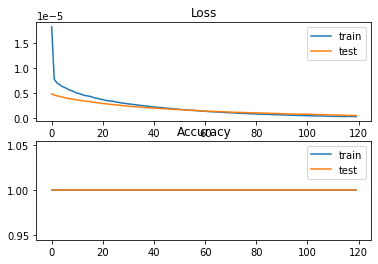

train number:~ 4
Epoch 1/120
55/55 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9908 - val_loss: 0.1717 - val_accuracy: 0.9559
Epoch 2/120
55/55 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9982 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3/120
55/55 [==============================] - 0s 3ms/step - loss: 3.6689e-04 - accuracy: 1.0000 - val_loss: 2.5662e-04 - val_accuracy: 1.0000
Epoch 4/120
55/55 [==============================] - 0s 3ms/step - loss: 2.1705e-05 - accuracy: 1.0000 - val_loss: 1.4940e-04 - val_accuracy: 1.0000
Epoch 5/120
55/55 [==============================] - 0s 3ms/step - loss: 1.5767e-05 - accuracy: 1.0000 - val_loss: 1.3519e-04 - val_accuracy: 1.0000
Epoch 6/120
55/55 [==============================] - 0s 3ms/step - loss: 1.3335e-05 - accuracy: 1.0000 - val_loss: 1.2652e-04 - val_accuracy: 1.0000
Epoch 7/120
55/55 [==============================] - 0s 4ms/step - loss: 1.1866e-05 - accuracy: 1.0000 - 

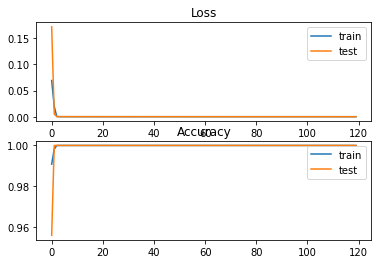

Accuracy mean:~ 0    0.998824
dtype: float64


In [80]:
#AR

# define the keras model
model_AR = Sequential()
model_AR.add(Dense(120, input_dim=120, activation='relu'))
model_AR.add(Dense(8, activation='relu'))
model_AR.add(Dense(18, activation='softmax'))

# compile the keras model
model_AR.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_categorial = to_categorical(y)


acc_ar = {}
for k in range(0,5):
  X_train_AR, X_test_AR, y_train_AR, y_test_AR = train_test_split(X1_train,y_categorial, 
                                                                  test_size=0.2, 
                                                                  random_state=k)
  
  X_train_AR, X_val_AR, y_train_AR, y_val_AR = train_test_split(X_train_AR, y_train_AR, 
                                                                  test_size=0.2, 
                                                                  random_state=k)
  # validation_data=(testX, testy)
  print('train number:~% i' % k)
  # fit the keras model on the dataset
  history = model_AR.fit(X_train_AR, y_train_AR,validation_data=(X_val_AR, y_val_AR), epochs=120, batch_size=10, verbose=1)

  # plot loss during training
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.show()

  # evaluate the keras model

  _,acc_ar[k] = model_AR.evaluate(X_test_AR, y_test_AR, verbose=0)



accdf = pd.DataFrame.from_dict(acc_ar, orient='index')
acc_mean_AR = accdf.mean()
print('Accuracy mean:~', acc_mean_AR)

train number:~ 0
Epoch 1/120
55/55 [==============================] - 1s 9ms/step - loss: 2.8531 - accuracy: 0.1250 - val_loss: 2.8147 - val_accuracy: 0.2132
Epoch 2/120
55/55 [==============================] - 0s 5ms/step - loss: 2.7826 - accuracy: 0.2004 - val_loss: 2.7351 - val_accuracy: 0.3382
Epoch 3/120
55/55 [==============================] - 0s 4ms/step - loss: 2.6736 - accuracy: 0.3327 - val_loss: 2.6121 - val_accuracy: 0.3529
Epoch 4/120
55/55 [==============================] - 0s 4ms/step - loss: 2.5131 - accuracy: 0.3842 - val_loss: 2.4436 - val_accuracy: 0.3235
Epoch 5/120
55/55 [==============================] - 0s 3ms/step - loss: 2.3047 - accuracy: 0.3915 - val_loss: 2.2297 - val_accuracy: 0.3529
Epoch 6/120
55/55 [==============================] - 0s 4ms/step - loss: 2.0748 - accuracy: 0.4136 - val_loss: 2.0109 - val_accuracy: 0.3971
Epoch 7/120
55/55 [==============================] - 0s 4ms/step - loss: 1.8549 - accuracy: 0.4338 - val_loss: 1.7985 - val_accuracy: 0.4

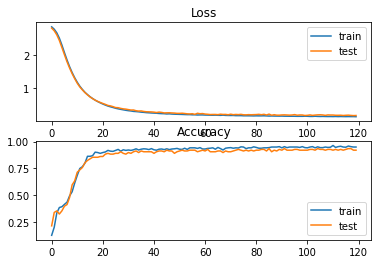

train number:~ 1
Epoch 1/120
55/55 [==============================] - 0s 4ms/step - loss: 0.1635 - accuracy: 0.9467 - val_loss: 0.1259 - val_accuracy: 0.9559
Epoch 2/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9430 - val_loss: 0.1412 - val_accuracy: 0.9559
Epoch 3/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9393 - val_loss: 0.1330 - val_accuracy: 0.9559
Epoch 4/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9449 - val_loss: 0.1402 - val_accuracy: 0.9485
Epoch 5/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9522 - val_loss: 0.1256 - val_accuracy: 0.9412
Epoch 6/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9357 - val_loss: 0.1303 - val_accuracy: 0.9559
Epoch 7/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9375 - val_loss: 0.1319 - val_accuracy: 0.9

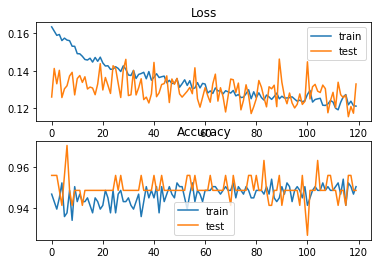

train number:~ 2
Epoch 1/120
55/55 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 0.9540 - val_loss: 0.1613 - val_accuracy: 0.9338
Epoch 2/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.9577 - val_loss: 0.1782 - val_accuracy: 0.9118
Epoch 3/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9577 - val_loss: 0.1689 - val_accuracy: 0.9265
Epoch 4/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9522 - val_loss: 0.1710 - val_accuracy: 0.9265
Epoch 5/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1093 - accuracy: 0.9540 - val_loss: 0.1694 - val_accuracy: 0.9265
Epoch 6/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9540 - val_loss: 0.1780 - val_accuracy: 0.9265
Epoch 7/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9559 - val_loss: 0.1666 - val_accuracy: 0.9

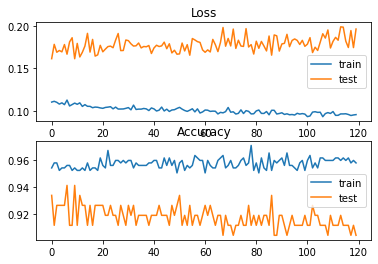

train number:~ 3
Epoch 1/120
55/55 [==============================] - 0s 3ms/step - loss: 0.1240 - accuracy: 0.9449 - val_loss: 0.2148 - val_accuracy: 0.9044
Epoch 2/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9375 - val_loss: 0.2120 - val_accuracy: 0.9044
Epoch 3/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9412 - val_loss: 0.2052 - val_accuracy: 0.9044
Epoch 4/120
55/55 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9393 - val_loss: 0.2173 - val_accuracy: 0.9044
Epoch 5/120
55/55 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.9467 - val_loss: 0.2075 - val_accuracy: 0.9044
Epoch 6/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9375 - val_loss: 0.2224 - val_accuracy: 0.9118
Epoch 7/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9412 - val_loss: 0.2359 - val_accuracy: 0.9

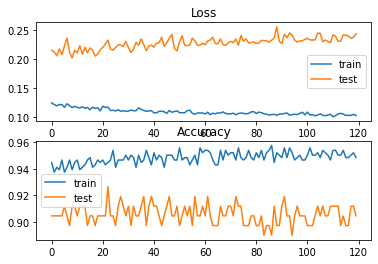

train number:~ 4
Epoch 1/120
55/55 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9412 - val_loss: 0.1931 - val_accuracy: 0.9265
Epoch 2/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9485 - val_loss: 0.1647 - val_accuracy: 0.9412
Epoch 3/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9393 - val_loss: 0.1770 - val_accuracy: 0.9412
Epoch 4/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.9449 - val_loss: 0.1589 - val_accuracy: 0.9338
Epoch 5/120
55/55 [==============================] - 0s 3ms/step - loss: 0.1275 - accuracy: 0.9412 - val_loss: 0.1617 - val_accuracy: 0.9338
Epoch 6/120
55/55 [==============================] - 0s 3ms/step - loss: 0.1237 - accuracy: 0.9449 - val_loss: 0.1679 - val_accuracy: 0.9338
Epoch 7/120
55/55 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9449 - val_loss: 0.1655 - val_accuracy: 0.9

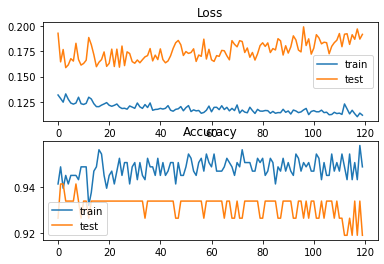

Accuracy mean:~ 0    0.935294
dtype: float64


In [82]:

# define the keras model
model_PCA = Sequential()
model_PCA.add(Dense(6, input_dim=6, activation='relu'))
model_PCA.add(Dense(20, activation='relu'))
model_PCA.add(Dense(18, activation='softmax'))

# compile the keras model
model_PCA.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#PCA
y_categorial = to_categorical(y)

#PCA
acc_pca = {}
for k in range(0,5):
  X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X2_train,y_categorial, 
                                                                  test_size=0.2, 
                                                                  random_state=k)
  
  X_train_PCA, X_val_PCA, y_train_PCA, y_val_PCA = train_test_split(X_train_PCA, y_train_PCA, 
                                                                  test_size=0.2, 
                                                                  random_state=k)
  # validation_data=(testX, testy)
  print('train number:~% i' % k)
  # fit the keras model on the dataset
  history = model_PCA.fit(X_train_PCA, y_train_PCA,validation_data=(X_val_PCA, y_val_PCA), epochs=120, batch_size=10, verbose=1)

  # plot loss during training
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.show()

  # evaluate the keras model

  _,acc_pca[k] = model_PCA.evaluate(X_test_PCA, y_test_PCA, verbose=0)



accdf = pd.DataFrame.from_dict(acc_pca, orient='index')
acc_mean_PCA = accdf.mean()
print('Accuracy mean:~', acc_mean_PCA)
